In [1]:
import pandas as pd
from sklearn.utils import shuffle
from keras.models import Model
from keras.layers import Input, Embedding, Dot, Add, Flatten
from keras.regularizers import l2
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('shrink_rating.csv')

In [3]:
# As before
N = df.user_id.max() + 1 # number of users
M = df.movie_id.max() + 1 # number of movies
print('The number of users is {} and of movies is {}'.format(N, M))

The number of users is 10000 and of movies is 2000


In [4]:
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [5]:
# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 25
reg = 0. # regularization penalty

In [6]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u) # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m) # (N, 1, K)

u_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(u) # (N, 1, 1)
m_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(m) # (N, 1, 1)
x = Dot(axes=2)([u_embedding, m_embedding]) # (N, 1, 1)

x = Add()([x, u_bias, m_bias])
x = Flatten()(x) # (N, 1)

In [7]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.01, momentum=0.9),
  metrics=['mse'],
)

In [8]:
r = model.fit(
  x=[df_train.user_id.values, df_train.movie_id.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=64,
  validation_data=(
    [df_test.user_id.values, df_test.movie_id.values],
    df_test.rating.values - mu
  )
)

c:\users\gaogaigar\anaconda3\envs\pythongpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7699189 samples, validate on 1924798 samples
Epoch 1/25
7699189/7699189 [==============================] - 415s 54us/step - loss: 0.8527 - mse: 0.8527 - val_loss: 0.8099 - val_mse: 0.8099
Epoch 2/25
7699189/7699189 [==============================] - 414s 54us/step - loss: 0.8076 - mse: 0.8076 - val_loss: 0.8076 - val_mse: 0.8076
Epoch 3/25
7699189/7699189 [==============================] - 403s 52us/step - loss: 0.8056 - mse: 0.8056 - val_loss: 0.8036 - val_mse: 0.8036
Epoch 4/25
7699189/7699189 [==============================] - 370s 48us/step - loss: 0.7885 - mse: 0.7885 - val_loss: 0.7666 - val_mse: 0.7666
Epoch 5/25
7699189/7699189 [==============================] - 371s 48us/step - loss: 0.7452 - mse: 0.7452 - val_loss: 0.7350 - val_mse: 0.7351
Epoch 6/25
7699189/7699189 [==============================] - 375s 49us/step - loss: 0.7263 - mse: 0.7263 - val_loss: 0.7211 - val_mse: 0.7211
Epoch 7/25
7699189/7699189 [==============================] - 377s 49us/step - loss: 0.7

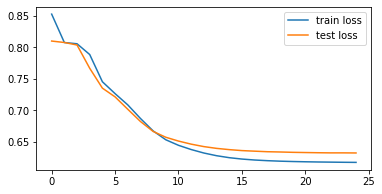

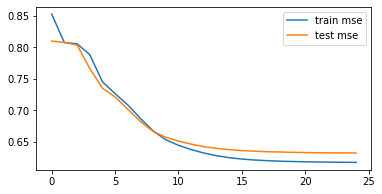

In [9]:
# plot losses
plt.figure(figsize = (6, 3))
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

# plot mse
plt.figure(figsize = (6, 3))
plt.plot(r.history['mse'], label="train mse")
plt.plot(r.history['val_mse'], label="test mse")
plt.legend()
plt.show()

In [10]:
# Just for record
print('The resulting val_loss is about: {}'.format(r.history['val_loss'][-1]))
print('The resulting val_mse is about: {}'.format(r.history['val_mse'][-1]))

The resulting val_loss is about: 0.6319630478404603
The resulting val_mse is about: 0.6319630742073059


In [11]:
0.6395448446273804**(1/2)

0.7997154772963821